O objetivo deste sistema de recomendação é sugerir produtos com base em sua aparência física (como cor, forma, textura, etc.) em vez de atributos textuais como preço, marca ou modelo. Abaixo está uma explicação detalhada de cada etapa do código:

Utilizaremos o dataset [E-commerce Products Image Dataset de Sunny Kusawa](https://www.kaggle.com/datasets/sunnykusawa/ecommerce-products-image-dataset) que contem 4 categorias de produtos com 199 imagens cada.



Montando o Google Drive:

Esta ação acessa seu Google Drive a partir do notebook Colab, permitindo que você acesse os arquivos armazenados no seu Drive.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Instalar TensorFlow e outras dependências:



O TensorFlow é uma biblioteca de código aberto de machine learning e é utilizado para carregar e treinar o modelo de deep learning.



O ResNet50 é uma CNN pré-treinada usada para extrair características de imagens. É um modelo de deep learning treinado com milhões de imagens.

In [2]:
import os
import tensorflow

from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.layers import GlobalMaxPooling2D

Modificando o Modelo:



- include_top=False: Remove a camada de classificação final do ResNet50.

- trainable=False: Garante que os pesos pré-treinados permaneçam fixos (não estamos ajustando o modelo).

In [3]:
model=ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable=False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Adicionando GlobalMaxPooling:



O GlobalMaxPooling comprime os mapas de características em uma representação vetorial de tamanho fixo, pegando o valor máximo de cada filtro. Isso reduz o tamanho dos dados enquanto retém informações importantes.


In [4]:
model=tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 2048)                │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

Carregar bibliotecas e módulos suplementares:

In [5]:
import cv2
import numpy as np

Função de Extração de Características:



1. Lê a imagem usando OpenCV.

2. Redimensiona a imagem para (224, 224) para coincidir com a forma de entrada do ResNet50.

3. Expande as dimensões para processamento em lotes.

4. Pré-processa a imagem (normalizando os valores dos pixels).

5. Prediz e reduz o vetor de características.

6. Normaliza o vetor para garantir uma escala uniforme.


In [6]:
def extract_feature(img_path, model):
  img=cv2.imread(img_path)
  img=cv2.resize(img,(224,224))
  img=np.array(img)
  expand_img=np.expand_dims(img,axis=0)
  pre_img=preprocess_input(expand_img)
  result=model.predict(pre_img).flatten()
  normalized_result=result/np.linalg.norm(result)
  return normalized_result

Extraindo Características:



1. Itera por todas as imagens nas pastas de produtos.

2. Extrai características para cada imagem usando a função de extração de características.

3. Armazena os caminhos dos arquivos em `filename` e as características correspondentes em `feature_list` de cada produto.

In [7]:
root_path = "/content/drive/MyDrive/datasets/ecommerce products"

filename_jeans=[]
feature_list_jeans=[]
for file in os.listdir(f'{root_path}/jeans'):
  try:
    filename_jeans.append(os.path.join(f'{root_path}/jeans',file))
    feature_list_jeans.append(extract_feature(os.path.join(f'{root_path}/jeans',file),model))
  except:
    pass

filename_sofa=[]
feature_list_sofa=[]
for file in os.listdir(f'{root_path}/sofa'):
  try:
    filename_sofa.append(os.path.join(f'{root_path}/sofa',file))
    feature_list_sofa.append(extract_feature(os.path.join(f'{root_path}/sofa',file),model))
  except:
    pass

filename_tshirt=[]
feature_list_tshirt=[]
for file in os.listdir(f'{root_path}/tshirt'):
  try:
    filename_tshirt.append(os.path.join(f'{root_path}/tshirt',file))
    feature_list_tshirt.append(extract_feature(os.path.join(f'{root_path}/tshirt',file),model))
  except:
    pass

filename_tv=[]
feature_list_tv=[]
for file in os.listdir(f'{root_path}/tv'):
  try:
    filename_tv.append(os.path.join(f'{root_path}/tv',file))
    feature_list_tv.append(extract_feature(os.path.join(f'{root_path}/tv',file),model))
  except:
    pass

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

Usando NearestNeighbors:



NearestNeighbors é usado para encontrar imagens semelhantes com base na distância euclidiana entre seus vetores de características.



- n_neighbors=6: Retorna 6 itens semelhantes para uma consulta determinada.

- algorithm="brute": Um método de busca direto.

- metric="euclidean": Mede a similaridade pela distância em linha reta entre vetores.



Imagem de Consulta:



- Usa o vetor de características da imagem de consulta (199.jpg) para encontrar seus 6 vizinhos mais próximos no conjunto de dados.



Retorna:



- indices: Índices das imagens semelhantes em `filename` de cada tipo de produto.

- distances: Distâncias entre a consulta e as imagens semelhantes.

In [8]:
from sklearn.neighbors import NearestNeighbors

neighbors_jeans=NearestNeighbors(n_neighbors=6, algorithm="brute", metric="euclidean")
neighbors_jeans.fit(feature_list_jeans)


distance_jeans, indices_jeans = neighbors_jeans.kneighbors([extract_feature(f"{root_path}/jeans/199.jpg", model)])


neighbors_sofa=NearestNeighbors(n_neighbors=6, algorithm="brute", metric="euclidean")
neighbors_sofa.fit(feature_list_sofa)


distance_sofa, indices_sofa = neighbors_sofa.kneighbors([extract_feature(f"{root_path}/sofa/10.jpg", model)])


neighbors_tshirt=NearestNeighbors(n_neighbors=6, algorithm="brute", metric="euclidean")
neighbors_tshirt.fit(feature_list_tshirt)


distance_tshirt, indices_tshirt = neighbors_tshirt.kneighbors([extract_feature(f"{root_path}/tshirt/101.jpg", model)])


neighbors_tv=NearestNeighbors(n_neighbors=6, algorithm="brute", metric="euclidean")
neighbors_tv.fit(feature_list_tv)


distance_tv, indices_tv = neighbors_tv.kneighbors([extract_feature(f"{root_path}/tv/13.jpg", model)])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Exibindo Imagens Semelhantes:



- Itera pelos índices das imagens semelhantes.

- Exibe cada imagem usando Matplotlib.


------------------------------------ ORIGINAL IMAGE ------------------------------------



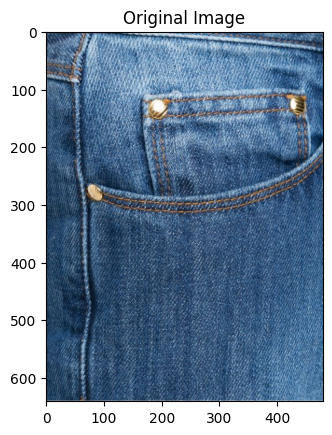

------------------------------------ RECOMMENDED IMAGES ------------------------------------



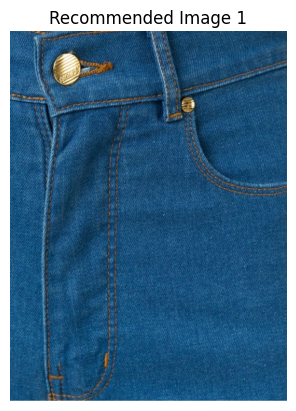

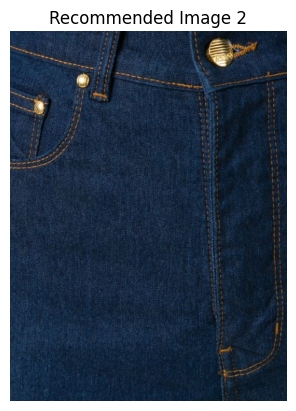

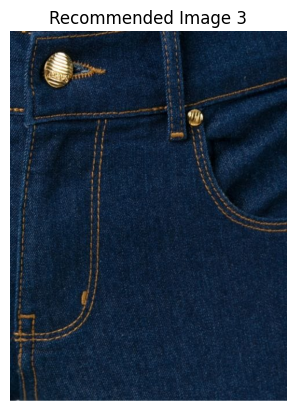

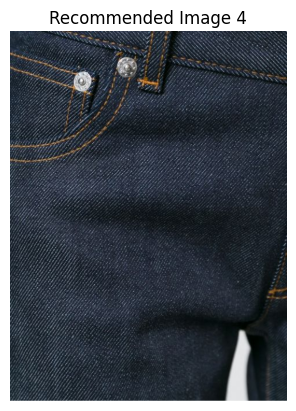

------------------------------------ ORIGINAL IMAGE ------------------------------------



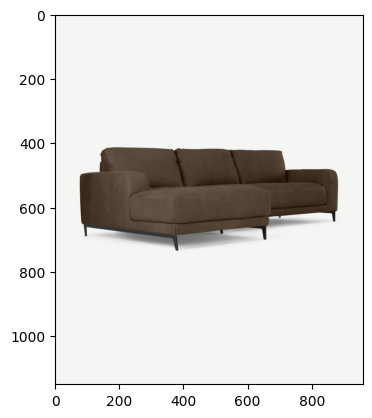

------------------------------------ RECOMMENDED IMAGES ------------------------------------



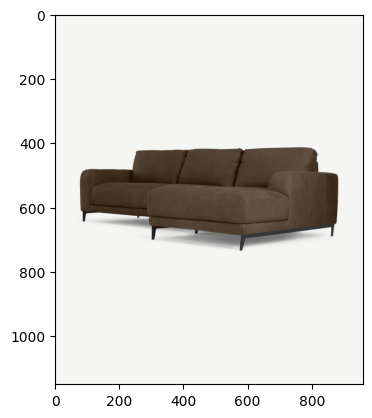

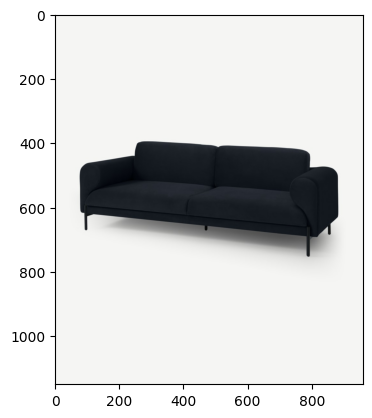

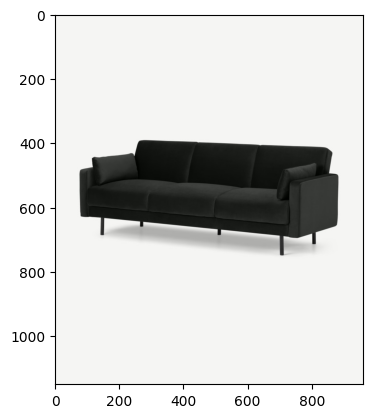

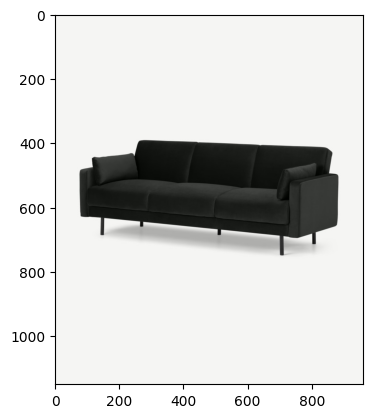

------------------------------------ ORIGINAL IMAGE ------------------------------------



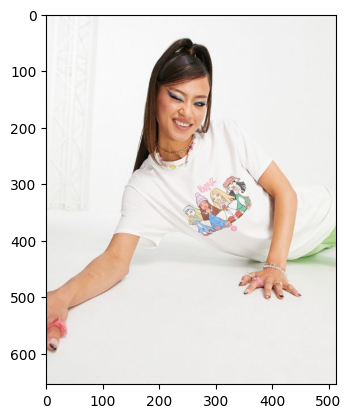

------------------------------------ RECOMMENDED IMAGES ------------------------------------



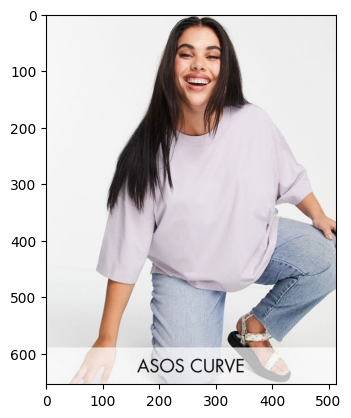

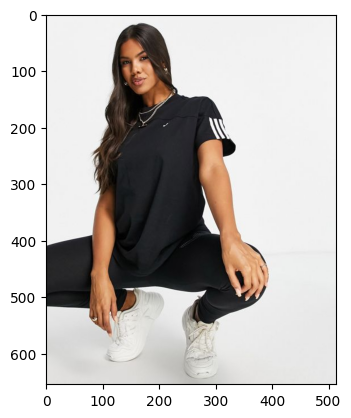

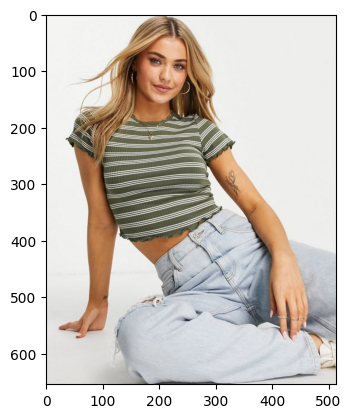

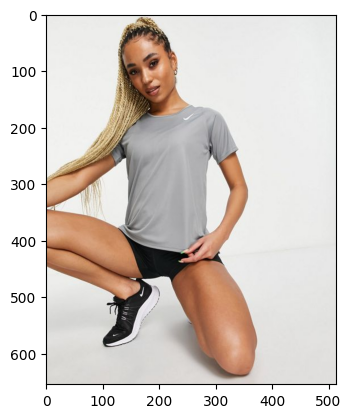

------------------------------------ ORIGINAL IMAGE ------------------------------------



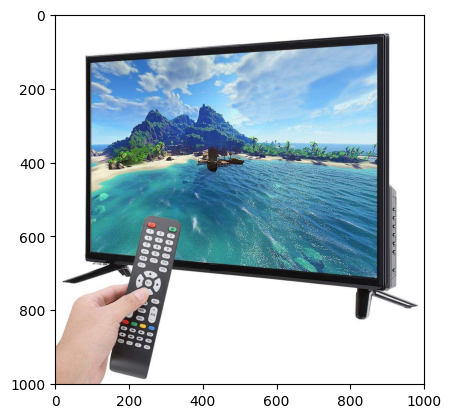

------------------------------------ RECOMMENDED IMAGES ------------------------------------



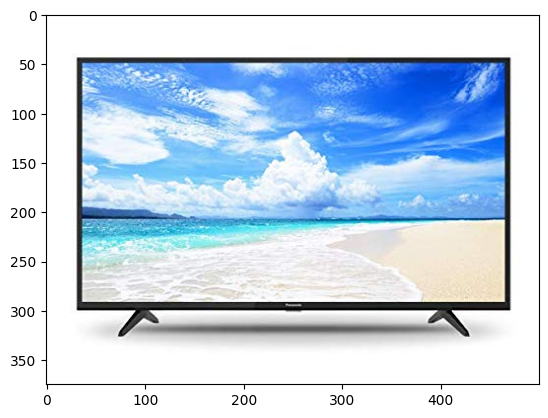

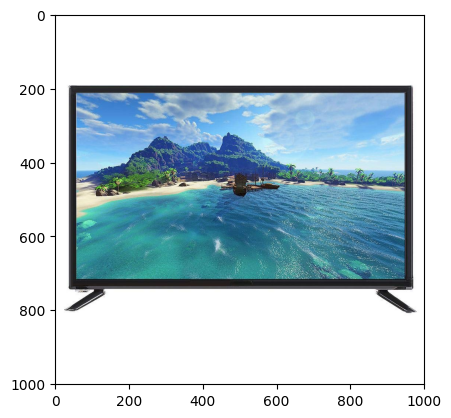

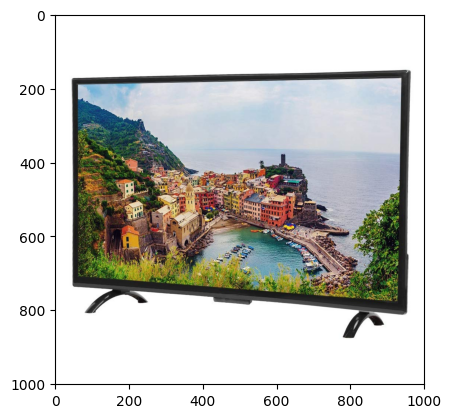

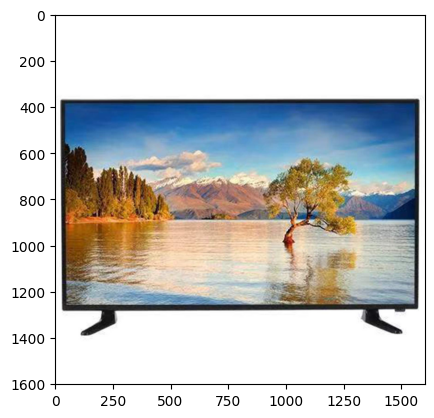

In [9]:
# Jeans Recommendations
import matplotlib.pyplot as plt


print("------------------------------------ ORIGINAL IMAGE ------------------------------------\n")


plt.imshow(plt.imread(f"{root_path}/jeans/199.jpg"))
plt.title("Original Image")
plt.show()


print("------------------------------------ RECOMMENDED IMAGES ------------------------------------\n")


for index, file_jeans in enumerate(indices_jeans[0][1:5]):
  plt.imshow(plt.imread(filename_jeans[file_jeans]))
  plt.title(f"Recommended Image {index+1}")
  plt.axis('off')
  plt.show()

# Sofa Recommendations


print("------------------------------------ ORIGINAL IMAGE ------------------------------------\n")


plt.imshow(plt.imread(f"{root_path}/sofa/10.jpg"))
plt.show()


print("------------------------------------ RECOMMENDED IMAGES ------------------------------------\n")
for file_sofa in indices_sofa[0][1:5]:
  plt.imshow(plt.imread(filename_sofa[file_sofa]))
  plt.show()

# Tshirt Recommendations


print("------------------------------------ ORIGINAL IMAGE ------------------------------------\n")


plt.imshow(plt.imread(f"{root_path}/tshirt/101.jpg"))
plt.show()


print("------------------------------------ RECOMMENDED IMAGES ------------------------------------\n")
for file_tshirt in indices_tshirt[0][1:5]:
  plt.imshow(plt.imread(filename_tshirt[file_tshirt]))
  plt.show()

# Tv Recommendations


print("------------------------------------ ORIGINAL IMAGE ------------------------------------\n")


plt.imshow(plt.imread(f"{root_path}/tv/13.jpg"))
plt.show()


print("------------------------------------ RECOMMENDED IMAGES ------------------------------------\n")
for file_tv in indices_tv[0][1:5]:
  plt.imshow(plt.imread(filename_tv[file_tv]))
  plt.show()